In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
shopee_data=pd.read_excel('Tai_nguyen_cung_cap/shopee_data.xlsx')
shopee_data.head()

,Unnamed: 0,Tên sp:,label:,Danh Mục,Kho hàng,Gửi từ,sale_price,org_price,discount,star,...,img_url,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI,ThỜI Gian PhẢN HỒI,Tham Gia,NgƯờI Theo DÕI,Thương hiệu,Bảo Hành
0,0,Sạc đa năng laptop,May_tinh_&_Laptop,Shopee-Máy tính & Laptop,100,"Quận Cầu Giấy, Hà Nội",115000,115000,0.00,0.0,...,"""https://cf.shopee.vn/file/25c4ee019c051cb3829...",0,41,127,1.00,trong vài giờ,33 tháng trước,"1,5k",NaN,NaN
1,1,Lót chuột - Pad chuột máy tính (11 họa tiết kh...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Bàn D...",694,"Quận Hoàng Mai, Hà Nội",25000,25000,0.00,4.8,...,NaN,308,478,113,0.83,trong vài ngày,12 tháng trước,"3,8k",no brand,Không Bảo Hành
2,2,Chuột Dây Asus Sica Gaming P301,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Chuột...",5,"Quận Thủ Đức, TP. Hồ Chí Minh",380000,590000,0.36,0.0,...,"""https://cf.shopee.vn/file/46e5adc31cf7f23404c...",0,19,130,1.00,trong vài giờ,3 tháng trước,"4,4k",asus,NaN
3,3,[PHÂN PHỐI] Bút thuyết trình chính hãng 1 đổi 1,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",49699,"Quận Phú Nhuận, TP. Hồ Chí Minh",299000,450000,0.34,5.0,...,"""https://cf.shopee.vn/file/6f9fae7be7f3b6cca1e...",301,51,8,0.86,trong vài ngày,2 tháng trước,"10,5k",logitech,3 tháng
4,4,Máy chiếu Led Salange M18-2020 1080P 15w đã sử...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",100,"Thành Phố Thái Nguyên, Thái Nguyên",3590000,5500000,0.35,0.0,...,"""https://cf.shopee.vn/file/bd3906cfa7a6a224f7f...",0,34,37,0.93,trong vài ngày,14 tháng trước,"6,8k",no brand,10 tháng


In [3]:
shopee_data.tail()

,Unnamed: 0,Tên sp:,label:,Danh Mục,Kho hàng,Gửi từ,sale_price,org_price,discount,star,...,img_url,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI,ThỜI Gian PhẢN HỒI,Tham Gia,NgƯờI Theo DÕI,Thương hiệu,Bảo Hành
499,500,Bộ kích sóng wifi Mercury MW310re 300Mbps 3 râ...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ Kích...,249,"Quận Hoàng Mai, Hà Nội",169000,199000,0.15,4.7,...,NaN,4300,3200,130,0.96,trong vài ngày,24 tháng trước,844,mercury,12 tháng
500,501,Bộ Chia Mạng Switch 16 Cổng Linksys LGS116 Tốc...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ chia...,10,"Quận Bình Tân, TP. Hồ Chí Minh",2399000,2899000,0.17,0.0,...,"""https://cf.shopee.vn/file/118c26e35d3d7545cf7...",0,10,68,0.79,trong vài giờ,4 năm trước,"3,3k",linksys,36 tháng
501,502,Bộ Chia Mạng Switch 24 Cổng Linksys LGS124 Tốc...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ chia...,10,"Quận Bình Tân, TP. Hồ Chí Minh",3099000,3399000,0.09,0.0,...,"""https://cf.shopee.vn/file/79fce7931a0214952e5...",0,10,68,0.79,trong vài giờ,4 năm trước,"3,3k",linksys,36 tháng
502,503,Bộ Phát Wifi Mesh MU-MIMO Linksys MR8300 Chuản...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ Phát...,10,"Quận Bình Tân, TP. Hồ Chí Minh",3899000,5100000,0.24,0.0,...,"""https://cf.shopee.vn/file/86f635933668b67d795...",0,10,68,0.79,trong vài giờ,4 năm trước,"3,3k",linksys,36 tháng
503,504,Bộ phát Wifi MU-MIMO Linksys EA8500 Max-Strea...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ Phát...,10,"Quận Bình Tân, TP. Hồ Chí Minh",6499000,7499000,0.13,0.0,...,"""https://cf.shopee.vn/file/900d5afcd0e56f1358a...",0,10,68,0.79,trong vài giờ,4 năm trước,"3,3k",linksys,36 tháng


In [4]:
shopee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          504 non-null    int64  
 1   Tên sp:             504 non-null    object 
 2   label:              504 non-null    object 
 3   Danh Mục            504 non-null    object 
 4   Kho hàng            504 non-null    int64  
 5   Gửi từ              503 non-null    object 
 6   sale_price          504 non-null    int64  
 7   org_price           504 non-null    int64  
 8   discount            504 non-null    float64
 9   star                504 non-null    float64
 10  rating              504 non-null    object 
 11  img_url             464 non-null    object 
 12  selled              504 non-null    int64  
 13  ĐáNh GiÁ            504 non-null    int64  
 14  SẢN PhẨM            504 non-null    int64  
 15  TỈ LỆ PhẢN HỒI      504 non-null    float64
 16  ThỜI Gia

In [5]:
shopee_data.describe()

,Unnamed: 0,Kho hàng,sale_price,org_price,discount,star,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI
count,504.000000,504.000000,5.040000e+02,5.040000e+02,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,251.819444,833.158730,1.092297e+06,1.225891e+06,0.087579,1.652381,96.722222,1371.533730,333.501984,0.939524
std,146.013715,6517.507065,1.996300e+06,2.201766e+06,0.133548,2.312313,528.437355,17186.431638,448.062664,0.137247
min,0.000000,1.000000,6.400000e+03,6.400000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.040000
25%,125.750000,10.000000,9.650000e+04,1.100000e+05,0.000000,0.000000,0.000000,41.000000,79.000000,0.940000
50%,251.500000,50.000000,2.550000e+05,2.775000e+05,0.000000,0.000000,0.000000,108.000000,216.000000,0.990000
75%,378.250000,100.000000,8.990000e+05,1.051000e+06,0.152500,4.900000,4.000000,552.750000,308.250000,1.000000
max,504.000000,99067.000000,1.499000e+07,1.499000e+07,0.550000,5.000000,6500.000000,383600.000000,2100.000000,1.000000


In [6]:
shopee_data = shopee_data.loc[:,~shopee_data.columns.str.startswith('Unnamed')]
print('So dong la: ', shopee_data.shape[0])
print('So cot la: ', shopee_data.shape[1])

So dong la:  504
So cot la:  20


In [7]:
# 5 thương hiệu được liệt kê nhiều nhất trong datasets
shopee_data['Thương hiệu'].value_counts().head()

no brand            206
hp                   28
dell                 18
coolman sunshine     13
tp-link              13
Name: Thương hiệu, dtype: int64

In [8]:
# 4. Drop các cột  'img_url', 'ThỜI Gian PhẢN HỒI', 'Tham Gia' (0.25 điểm)
shopee_data.drop(columns=['img_url', 'ThỜI Gian PhẢN HỒI', 'Tham Gia'], inplace=True)
shopee_data

,Tên sp:,label:,Danh Mục,Kho hàng,Gửi từ,sale_price,org_price,discount,star,rating,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI,NgƯờI Theo DÕI,Thương hiệu,Bảo Hành
0,Sạc đa năng laptop,May_tinh_&_Laptop,Shopee-Máy tính & Laptop,100,"Quận Cầu Giấy, Hà Nội",115000,115000,0.00,0.0,0,0,41,127,1.00,"1,5k",NaN,NaN
1,Lót chuột - Pad chuột máy tính (11 họa tiết kh...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Bàn D...",694,"Quận Hoàng Mai, Hà Nội",25000,25000,0.00,4.8,61,308,478,113,0.83,"3,8k",no brand,Không Bảo Hành
2,Chuột Dây Asus Sica Gaming P301,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Chuột...",5,"Quận Thủ Đức, TP. Hồ Chí Minh",380000,590000,0.36,0.0,0,0,19,130,1.00,"4,4k",asus,NaN
3,[PHÂN PHỐI] Bút thuyết trình chính hãng 1 đổi 1,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",49699,"Quận Phú Nhuận, TP. Hồ Chí Minh",299000,450000,0.34,5.0,1,301,51,8,0.86,"10,5k",logitech,3 tháng
4,Máy chiếu Led Salange M18-2020 1080P 15w đã sử...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",100,"Thành Phố Thái Nguyên, Thái Nguyên",3590000,5500000,0.35,0.0,0,0,34,37,0.93,"6,8k",no brand,10 tháng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Bộ kích sóng wifi Mercury MW310re 300Mbps 3 râ...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ Kích...,249,"Quận Hoàng Mai, Hà Nội",169000,199000,0.15,4.7,"1,2k",4300,3200,130,0.96,844,mercury,12 tháng
500,Bộ Chia Mạng Switch 16 Cổng Linksys LGS116 Tốc...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ chia...,10,"Quận Bình Tân, TP. Hồ Chí Minh",2399000,2899000,0.17,0.0,0,0,10,68,0.79,"3,3k",linksys,36 tháng
501,Bộ Chia Mạng Switch 24 Cổng Linksys LGS124 Tốc...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ chia...,10,"Quận Bình Tân, TP. Hồ Chí Minh",3099000,3399000,0.09,0.0,0,0,10,68,0.79,"3,3k",linksys,36 tháng
502,Bộ Phát Wifi Mesh MU-MIMO Linksys MR8300 Chuản...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ Phát...,10,"Quận Bình Tân, TP. Hồ Chí Minh",3899000,5100000,0.24,0.0,0,0,10,68,0.79,"3,3k",linksys,36 tháng


In [9]:
# 5. Cột 'NgƯờI Theo DÕI' giá trị có 4 chữ số sẽ được chuyển thành dạng chữ 1000 --> 1k, hãy đổi lại thành dạng số. 
# Nếu bị null, hãy drop bỏ dòng đó (0.5 điểm).

regex_pat = re.compile(r'[kKM]+$|,', flags=re.IGNORECASE)
shopee_data['NgƯờI Theo DÕI'] = shopee_data['NgƯờI Theo DÕI'].replace(regex_pat, '', regex=True).astype(float)*shopee_data['NgƯờI Theo DÕI'].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int)
shopee_data

,Tên sp:,label:,Danh Mục,Kho hàng,Gửi từ,sale_price,org_price,discount,star,rating,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI,NgƯờI Theo DÕI,Thương hiệu,Bảo Hành
0,Sạc đa năng laptop,May_tinh_&_Laptop,Shopee-Máy tính & Laptop,100,"Quận Cầu Giấy, Hà Nội",115000,115000,0.00,0.0,0,0,41,127,1.00,15000.0,NaN,NaN
1,Lót chuột - Pad chuột máy tính (11 họa tiết kh...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Bàn D...",694,"Quận Hoàng Mai, Hà Nội",25000,25000,0.00,4.8,61,308,478,113,0.83,38000.0,no brand,Không Bảo Hành
2,Chuột Dây Asus Sica Gaming P301,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Chuột...",5,"Quận Thủ Đức, TP. Hồ Chí Minh",380000,590000,0.36,0.0,0,0,19,130,1.00,44000.0,asus,NaN
3,[PHÂN PHỐI] Bút thuyết trình chính hãng 1 đổi 1,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",49699,"Quận Phú Nhuận, TP. Hồ Chí Minh",299000,450000,0.34,5.0,1,301,51,8,0.86,105000.0,logitech,3 tháng
4,Máy chiếu Led Salange M18-2020 1080P 15w đã sử...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",100,"Thành Phố Thái Nguyên, Thái Nguyên",3590000,5500000,0.35,0.0,0,0,34,37,0.93,68000.0,no brand,10 tháng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Bộ kích sóng wifi Mercury MW310re 300Mbps 3 râ...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ Kích...,249,"Quận Hoàng Mai, Hà Nội",169000,199000,0.15,4.7,"1,2k",4300,3200,130,0.96,844.0,mercury,12 tháng
500,Bộ Chia Mạng Switch 16 Cổng Linksys LGS116 Tốc...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ chia...,10,"Quận Bình Tân, TP. Hồ Chí Minh",2399000,2899000,0.17,0.0,0,0,10,68,0.79,33000.0,linksys,36 tháng
501,Bộ Chia Mạng Switch 24 Cổng Linksys LGS124 Tốc...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ chia...,10,"Quận Bình Tân, TP. Hồ Chí Minh",3099000,3399000,0.09,0.0,0,0,10,68,0.79,33000.0,linksys,36 tháng
502,Bộ Phát Wifi Mesh MU-MIMO Linksys MR8300 Chuản...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ Phát...,10,"Quận Bình Tân, TP. Hồ Chí Minh",3899000,5100000,0.24,0.0,0,0,10,68,0.79,33000.0,linksys,36 tháng


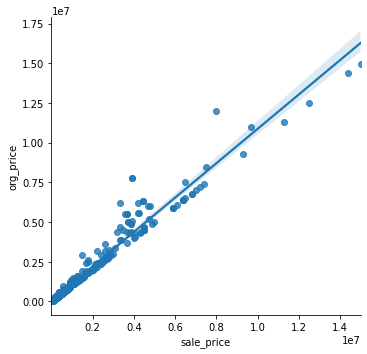

In [10]:
# 6.Vẽ lmplot giữa sale_price và org_price và nhận xét (0.75 điểm)
sns.lmplot(
    data=shopee_data,
    x='sale_price',
    y='org_price'
)
# Trong mối quan hệ tuyến tính giữa sale_price và org_price, 
# ta thấy rằng khi giá trị sản phẩm càng cao, 
# người bán hàng thường tăng khoảng chênh lệch giữa giá bán và giá bán sau khi giảm giá, 
# độ tin cậy dữ liệu càng giảm dần.

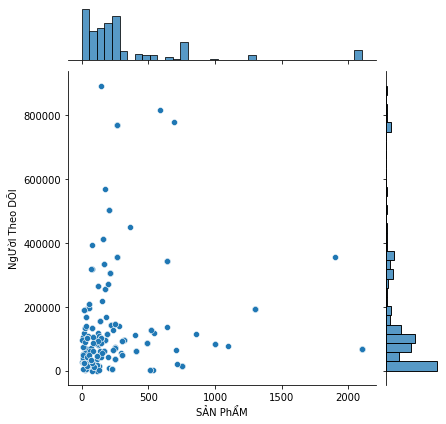

In [11]:
# 7.	Vẽ jointplot giữa cột SẢN PhẨM và NgƯờI Theo DÕI và nhận xét (0.75 điểm)
sns.jointplot(
    data=shopee_data,
    x='SẢN PhẨM',
    y='NgƯờI Theo DÕI'
)
# Biểu đồ tập trung về khu vực nhà cung cấp có ít sản phẩm và có ít người theo dõi. 
# Cũng có một số số liệu không đáng tin cậy khi nhà cung cấp có ít sản phẩm nhưng vẫn có rất nhiều người theo dõi.

In [12]:
# 8.	Kiểm tra xem 2 cột Kho hàng và SẢN PhẨM có hệ số tương quan là bao nhiêu (0.25 điểm)
shopee_data[['Kho hàng', 'SẢN PhẨM']].corr()

,Kho hàng,SẢN PhẨM
Kho hàng,1.000000,-0.050297
SẢN PhẨM,-0.050297,1.000000


/home/hunglv/Desktop/course-MachineLearning/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='discount', ylabel='Density'>

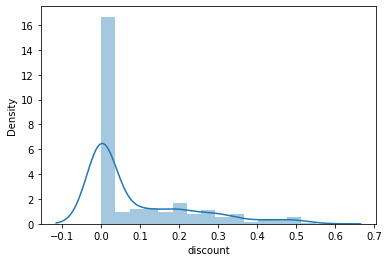

In [13]:
# Vẽ displot của discount và nhận xét biểu đồ (0.5 điểm)
sns.distplot(
    shopee_data.discount
)
# Hầu hết các cấp sản phẩm đều không có discount

In [14]:
# 10.	Tách phần tử cuối cùng sau dấu , của cột Gửi từ để tạo thành cột vị trí kho hàng (0.5 điểm)
shopee_data['Vị trí kho hàng']=shopee_data['Gửi từ'].str.rsplit(',').str[-1] 
shopee_data.head()

,Tên sp:,label:,Danh Mục,Kho hàng,Gửi từ,sale_price,org_price,discount,star,rating,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI,NgƯờI Theo DÕI,Thương hiệu,Bảo Hành,Vị trí kho hàng
0,Sạc đa năng laptop,May_tinh_&_Laptop,Shopee-Máy tính & Laptop,100,"Quận Cầu Giấy, Hà Nội",115000,115000,0.00,0.0,0,0,41,127,1.00,15000.0,NaN,NaN,Hà Nội
1,Lót chuột - Pad chuột máy tính (11 họa tiết kh...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Bàn D...",694,"Quận Hoàng Mai, Hà Nội",25000,25000,0.00,4.8,61,308,478,113,0.83,38000.0,no brand,Không Bảo Hành,Hà Nội
2,Chuột Dây Asus Sica Gaming P301,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Chuột...",5,"Quận Thủ Đức, TP. Hồ Chí Minh",380000,590000,0.36,0.0,0,0,19,130,1.00,44000.0,asus,NaN,TP. Hồ Chí Minh
3,[PHÂN PHỐI] Bút thuyết trình chính hãng 1 đổi 1,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",49699,"Quận Phú Nhuận, TP. Hồ Chí Minh",299000,450000,0.34,5.0,1,301,51,8,0.86,105000.0,logitech,3 tháng,TP. Hồ Chí Minh
4,Máy chiếu Led Salange M18-2020 1080P 15w đã sử...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",100,"Thành Phố Thái Nguyên, Thái Nguyên",3590000,5500000,0.35,0.0,0,0,34,37,0.93,68000.0,no brand,10 tháng,Thái Nguyên


<AxesSubplot:ylabel='Vị trí kho hàng'>

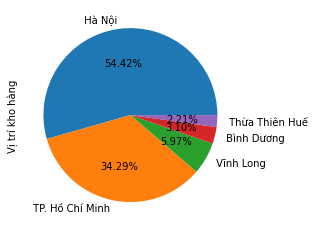

In [15]:
# 11.	Vẽ pie chart cột 'Vị trí kho hàng' với 5 vị trí nhiều nhất và nhận xét biểu đồ (0.5 điểm)
address=shopee_data['Vị trí kho hàng'].value_counts().head()
address.plot.pie(autopct='%.2f%%')
# Có hơn 54% sản phẩm được tập kết tại kho hàng Hà Nội, 
# kho hàng lớn thứ hai ở TP. Hồ Chí Minh.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f90f5331a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f90f52c0190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f90f5331730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f90f52c0850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f90f52c0bb0>],
 'means': []}

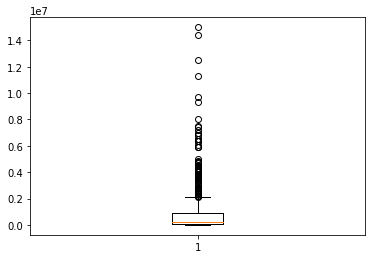

In [16]:
# 12.	Vẽ boxplot cột sale_price bằng matplotlib, nhận xét (0.5 điểm)
plt.boxplot(data=shopee_data,x='sale_price')
# Giá trị các sản phẩm không đồng đều nhau, sự chênh lệch giá giữa các sản phẩm là rất lớn.

In [17]:
# 13.	Loại bỏ outlier ở cột sale_price sử dụng công thức IQR để loại bỏ và in ra số dòng sau khi loại bỏ (0.5 điểm)
sale_price=shopee_data['sale_price']
Q1 = np.percentile(sale_price, 25, interpolation='midpoint')
Q3 = np.percentile(sale_price, 75, interpolation='midpoint') 
IQR = Q3 - Q1
Q4 = Q3 + 1.5 * IQR
print('số dòng còn lại sau khi loại bỏ outlier: ', len(shopee_data[shopee_data['sale_price'] <= Q4]))

số dòng còn lại sau khi loại bỏ outlier:  421


In [18]:
# 14.	Groupby Vị trí kho hàng, Thương hiệu rồi tính mean cột Kho hàng (0.25 điểm) 
shopee_data[['Vị trí kho hàng', 'Thương hiệu', 'Kho hàng']].groupby(['Vị trí kho hàng', 'Thương hiệu']).mean()

Kho hàng
Vị trí kho hàng Thương hiệu             
 An Giang       intel™       1112.000000
 Bình Dương     asus            2.800000
                dell           11.333333
                hp             12.000000
                lenovo          8.500000
...                                  ...
 Vĩnh Long      no brand       55.000000
                toshiba        23.666667
                tp-link        17.000000
 Đắk Lắk        lb-link        95.000000
 Đồng Nai       no brand      500.000000

[116 rows x 1 columns]

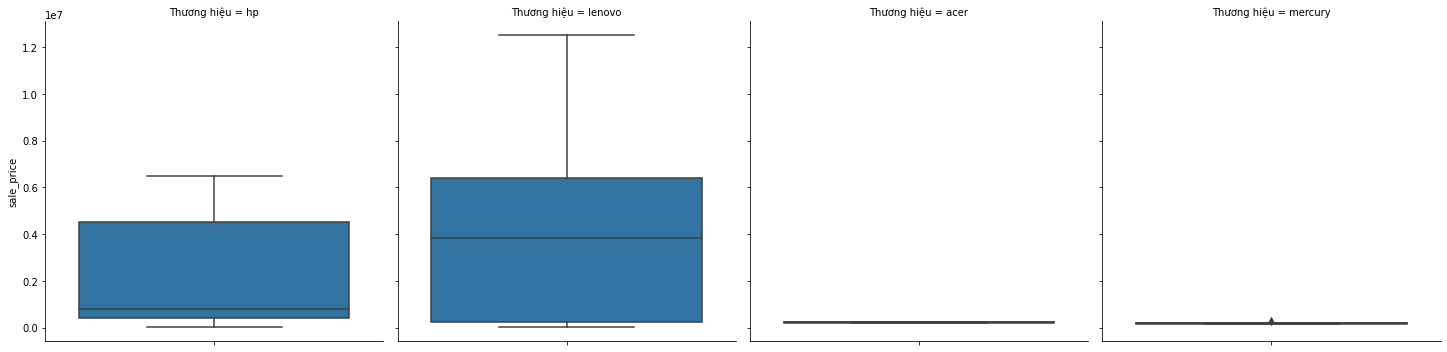

In [19]:
# 15.	Vẽ catplot cho cột sale_price, kind=box, col=Thương hiệu, col_order='hp','lenovo','acer','mercury' và nhận xét biểu đồ (0.5 điểm)
sns.catplot(
    data=shopee_data,
    y='sale_price',
    kind='box',
    col='Thương hiệu',
    col_order=['hp','lenovo','acer','mercury']
)
# Các thương hiệu có uy tín như HP, Lenovo, Acer có giá sản phẩm đã niêm yết nên hầu như các store có giá đồng đều nhau, 
# riêng đối với sản phẩm Mercury thì xuất hiện một số giá trị Outlier

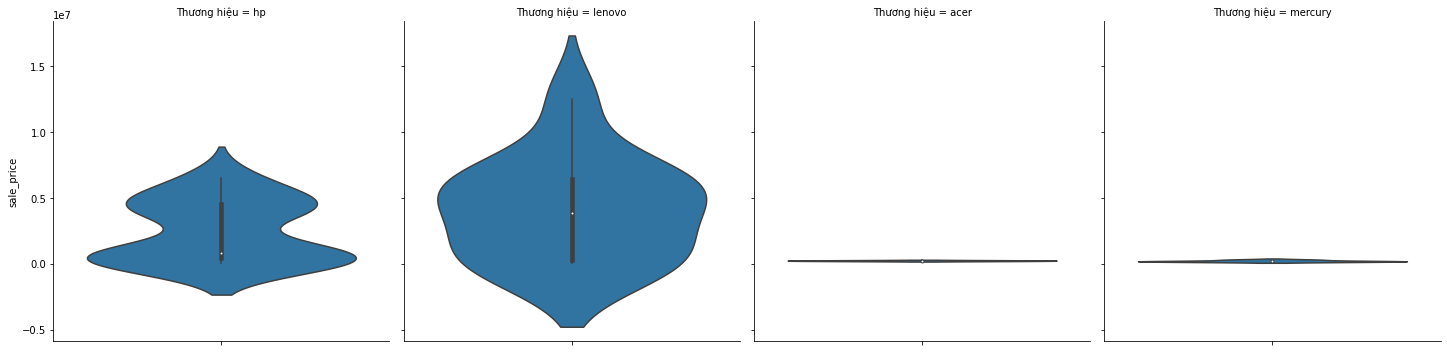

In [20]:
sns.catplot(
    data=shopee_data,
    y='sale_price',
    kind='violin',
    col='Thương hiệu',
    col_order=['hp','lenovo','acer','mercury']
)